# YouTube Recommendation System's Evolutionary Dynamics (watch time)

## Imports

In [1]:
from recommendation_systems_evolutionary_dynamics import EGT, OUTPUT_PATH
import numpy as np
import posixpath
import matplotlib.pylab as plt

## Initialize Game
1. Strategies counts for each populations (imiplicitly defining populations sizes)
2. actions names
3. players names
4. payoff matrix

(cl, ch): (0.0, 0.0) | (ul, uh): (0.0, 0.0)


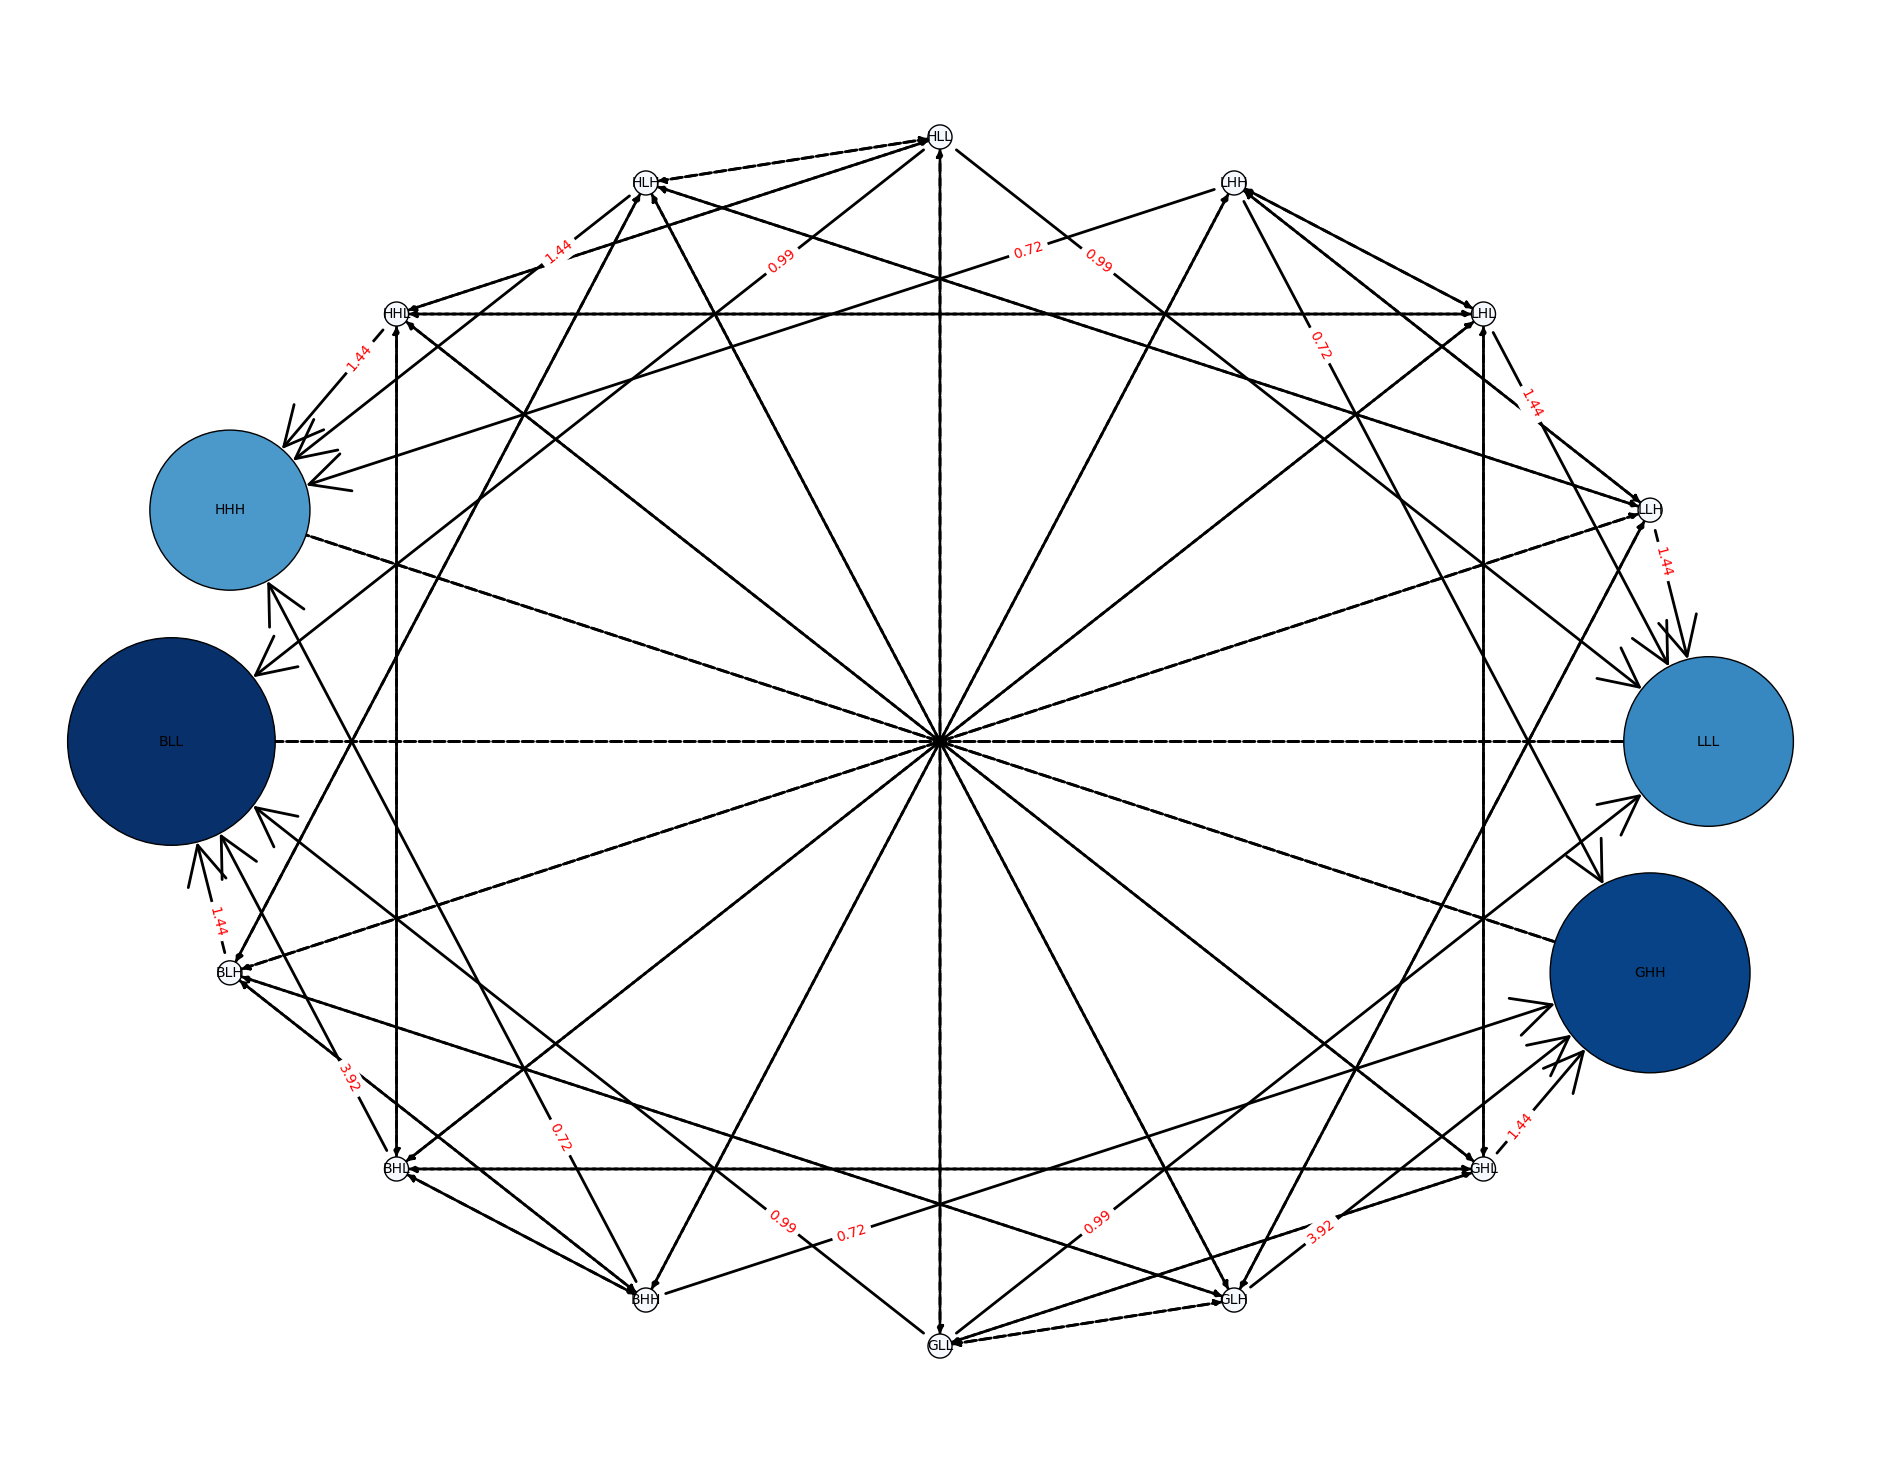

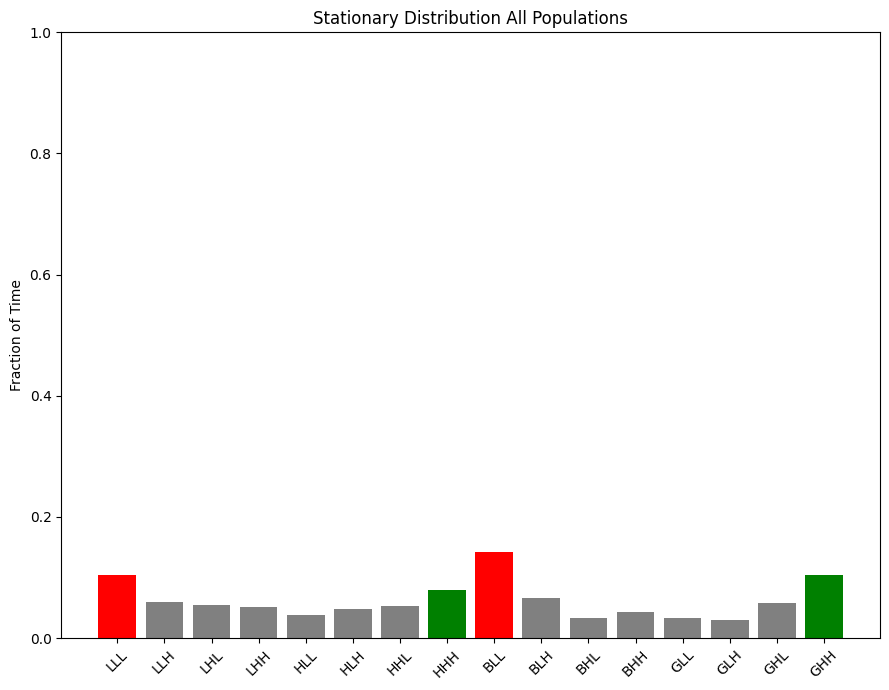

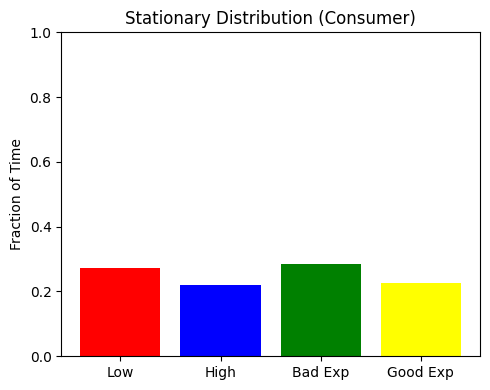

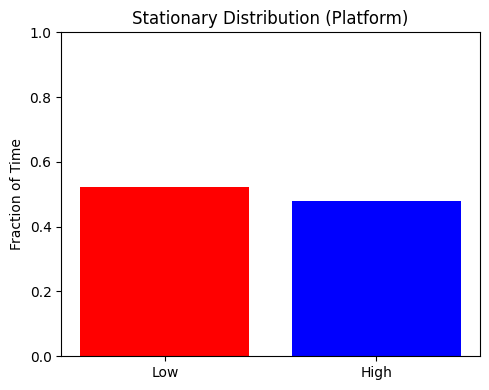

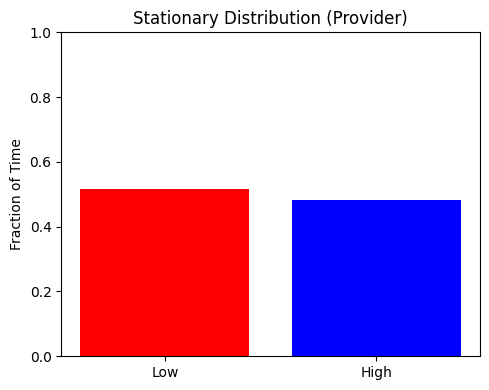

(cl, ch): (0.05, 0.15) | (ul, uh): (0.0, 0.0)


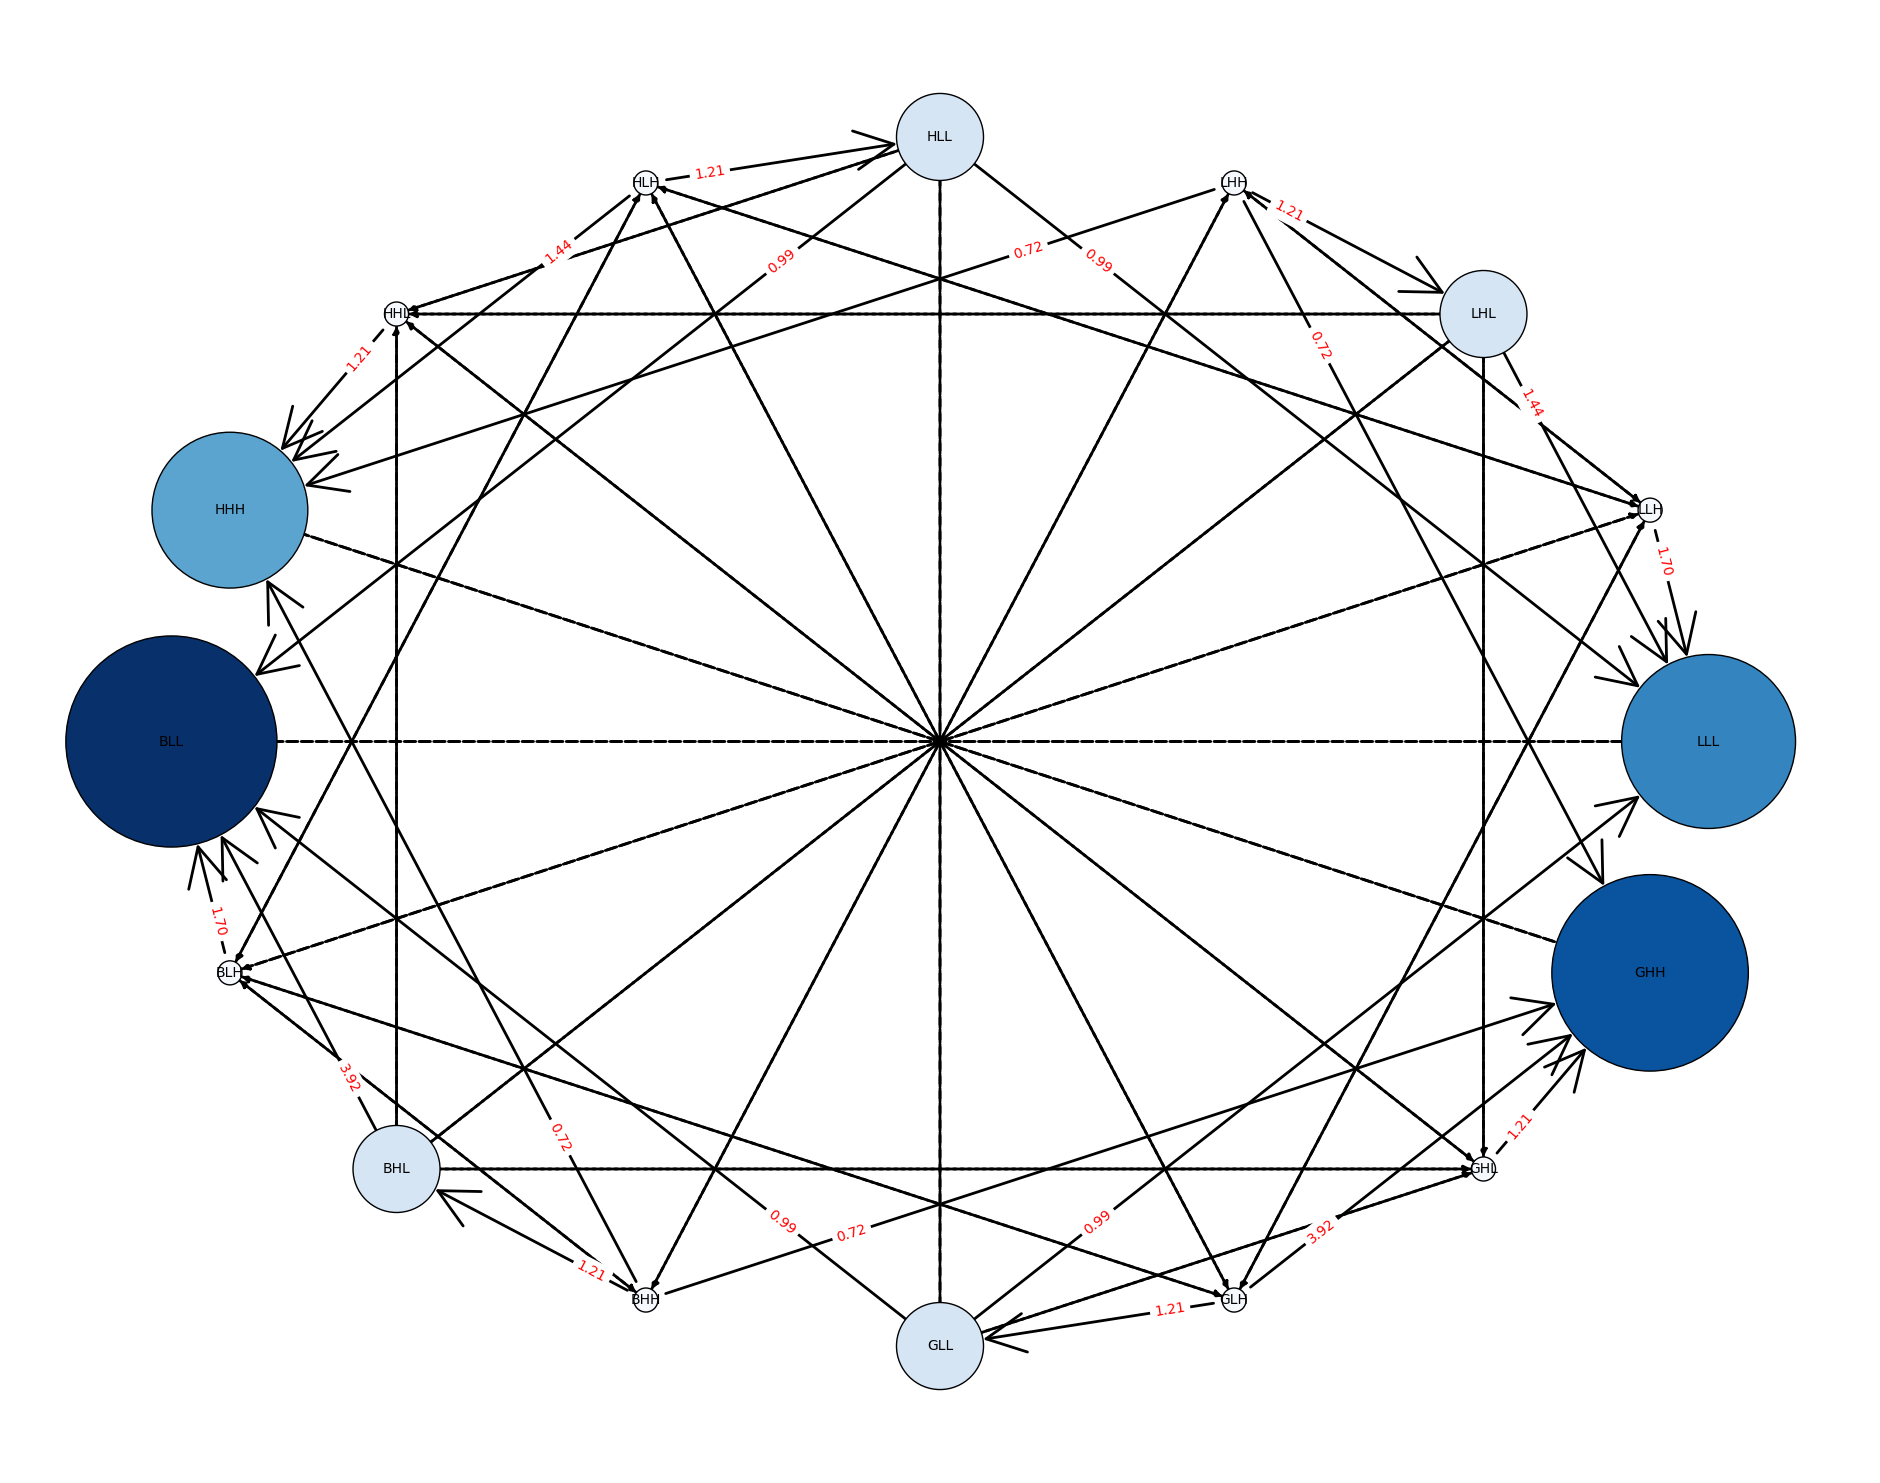

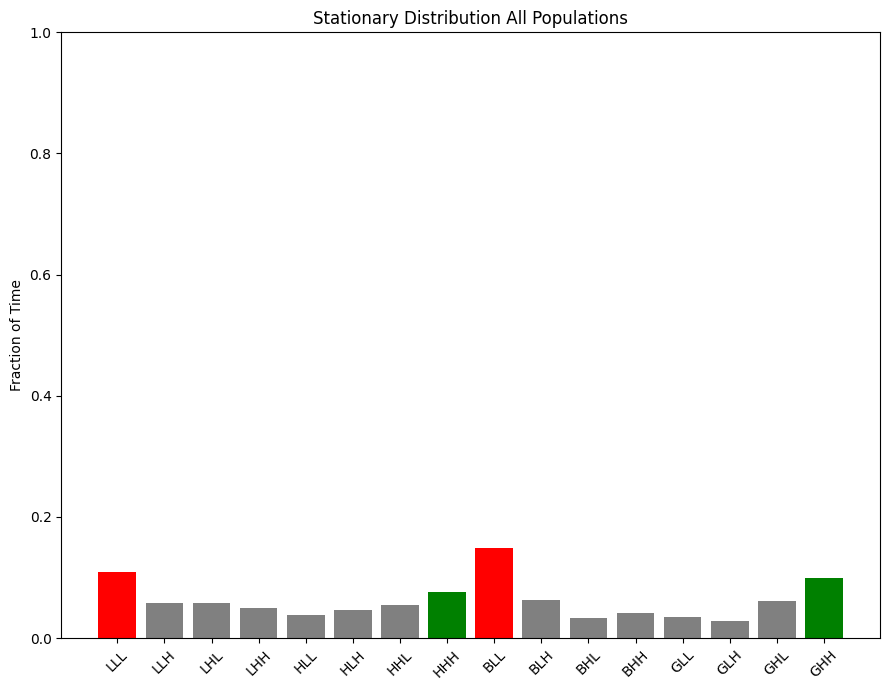

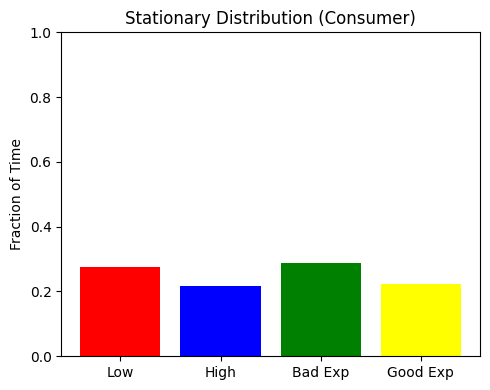

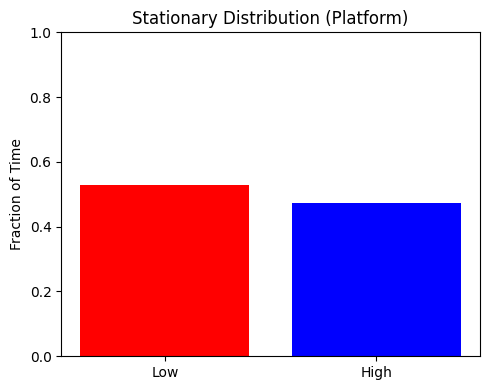

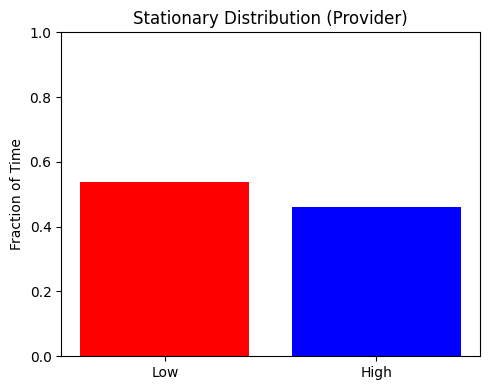

(cl, ch): (0.05, 0.15) | (ul, uh): (0.2, 0.4)


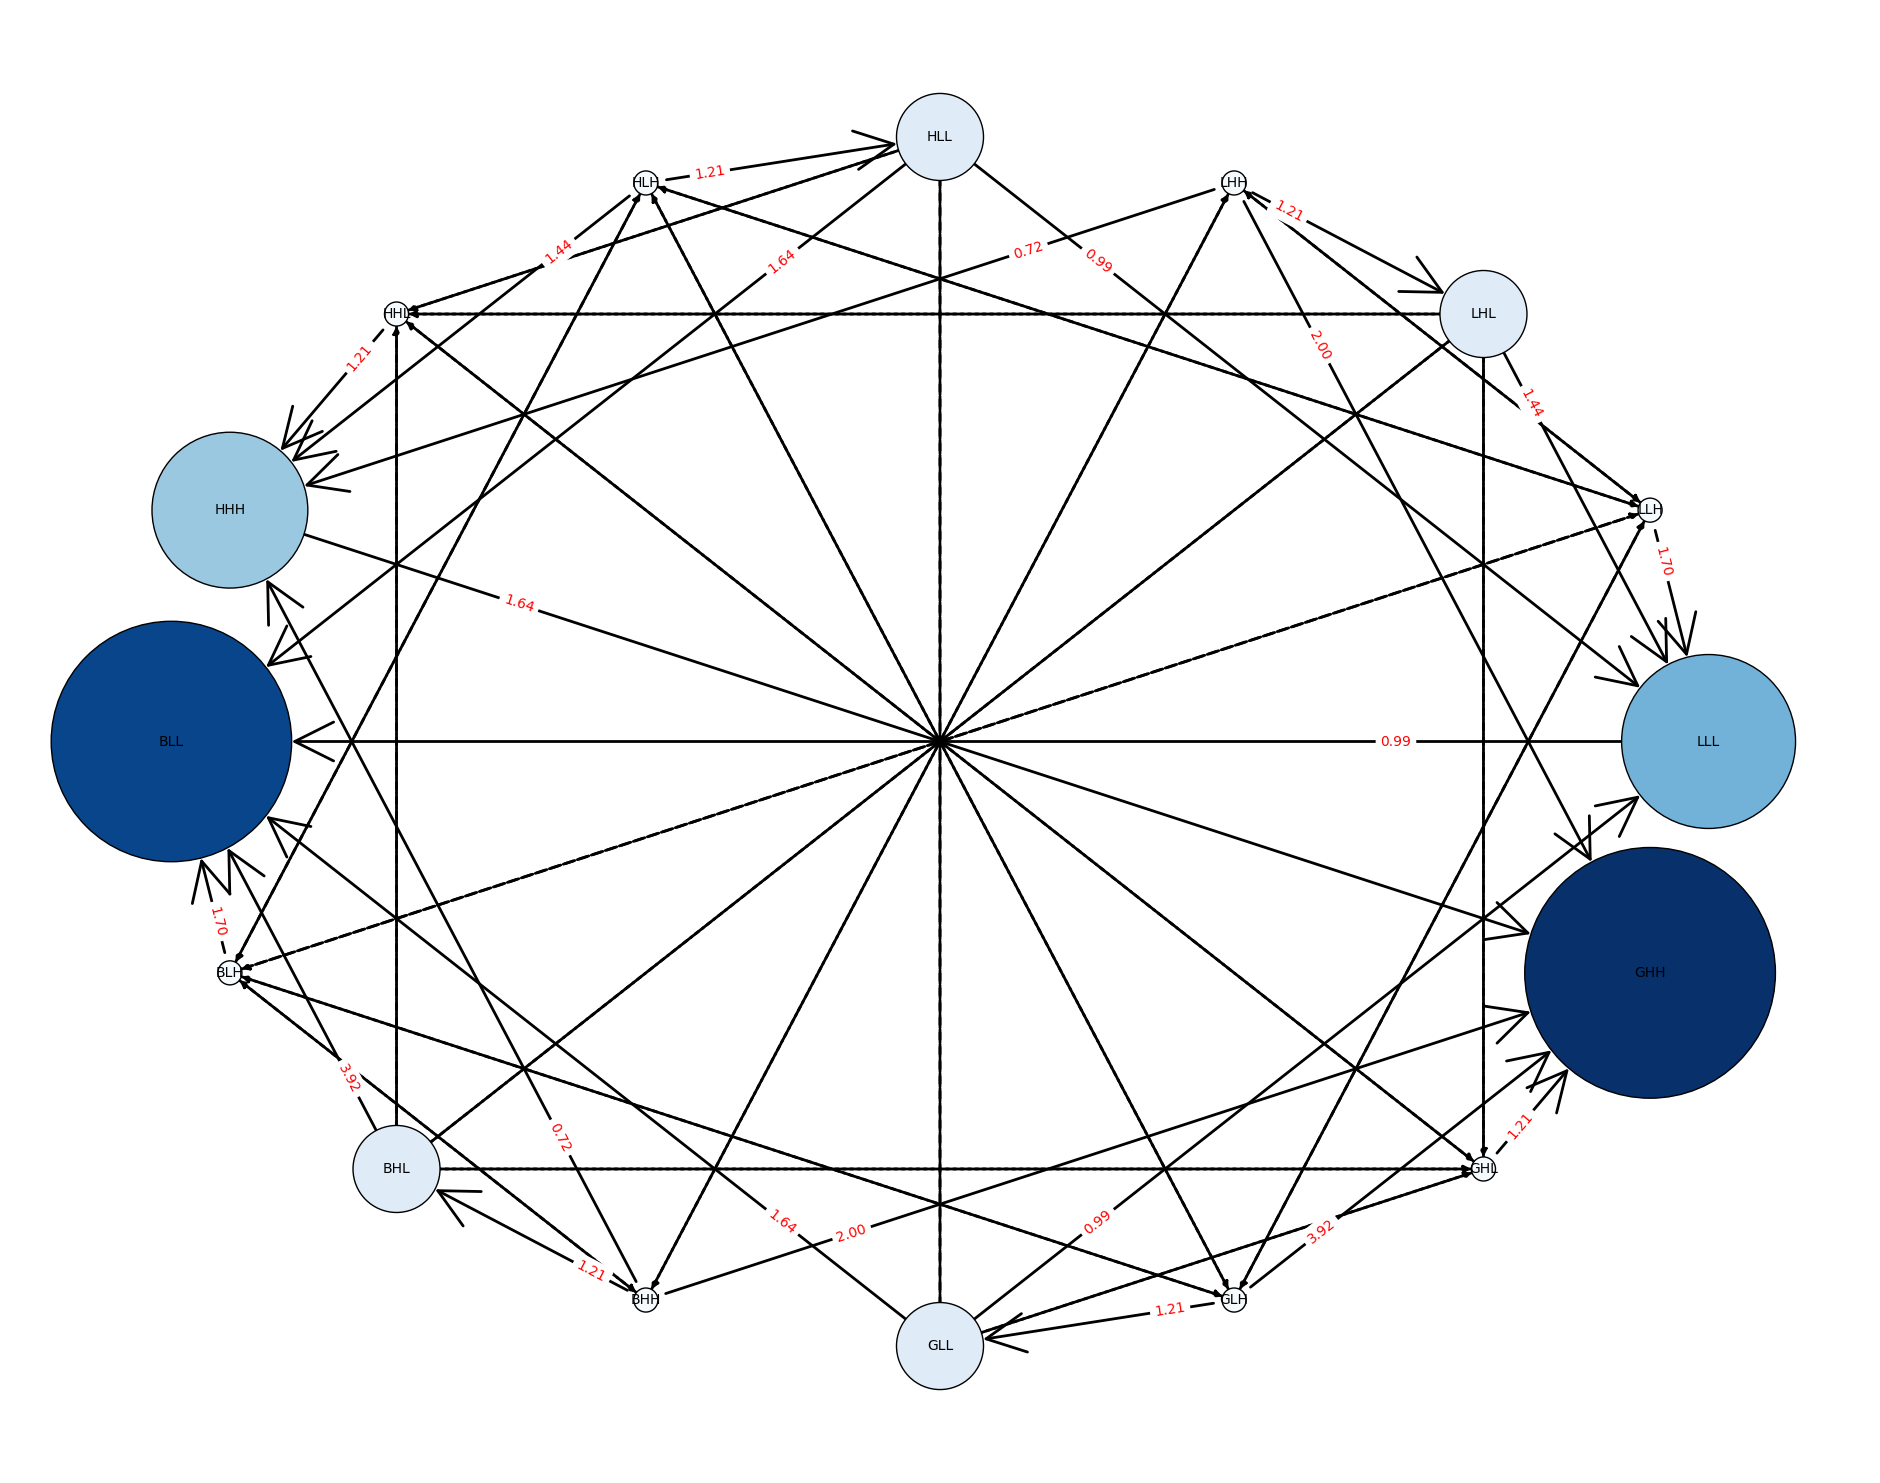

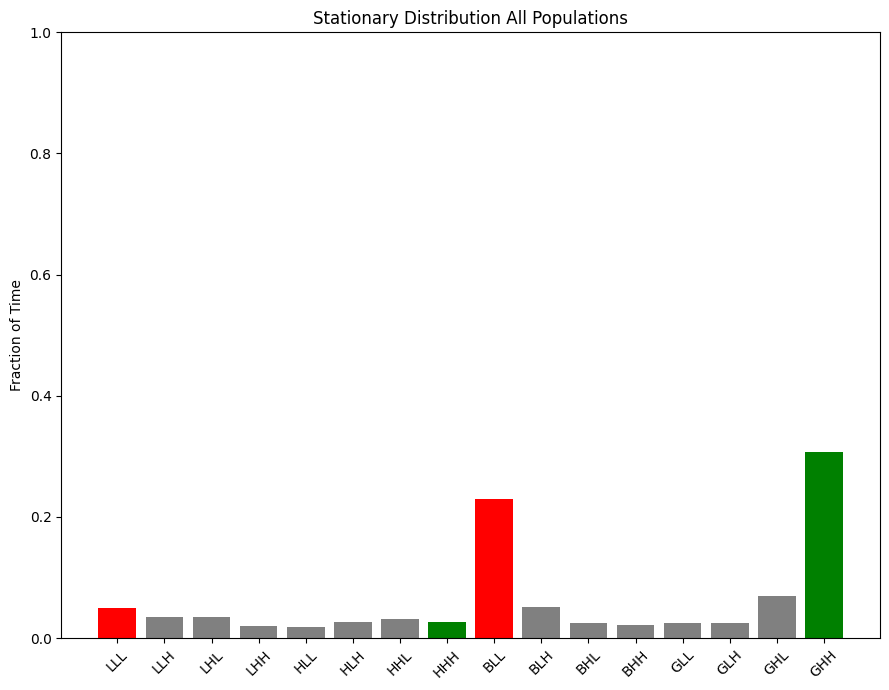

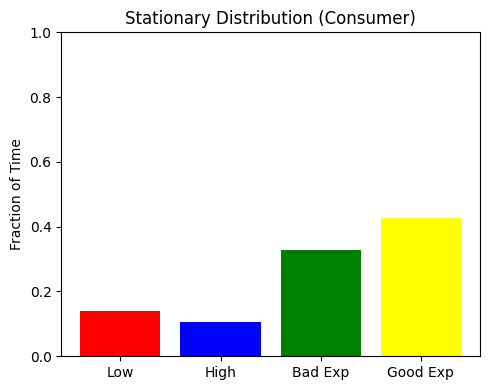

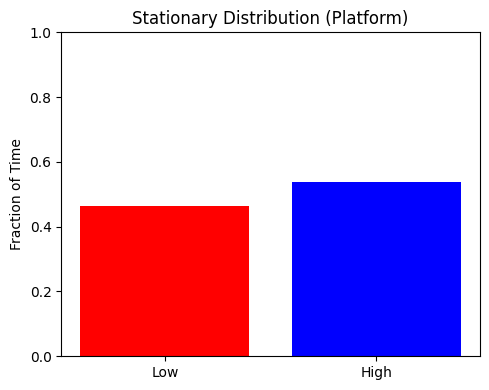

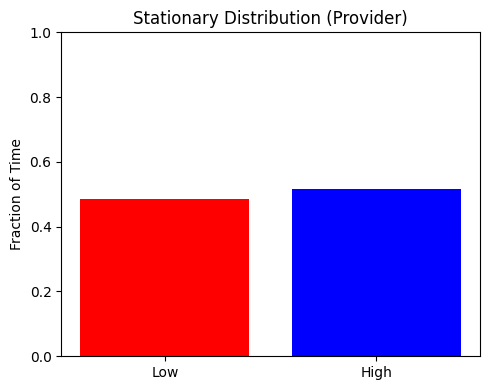

(cl, ch): (0.05, 0.15) | (ul, uh): (0.2, 0.8)


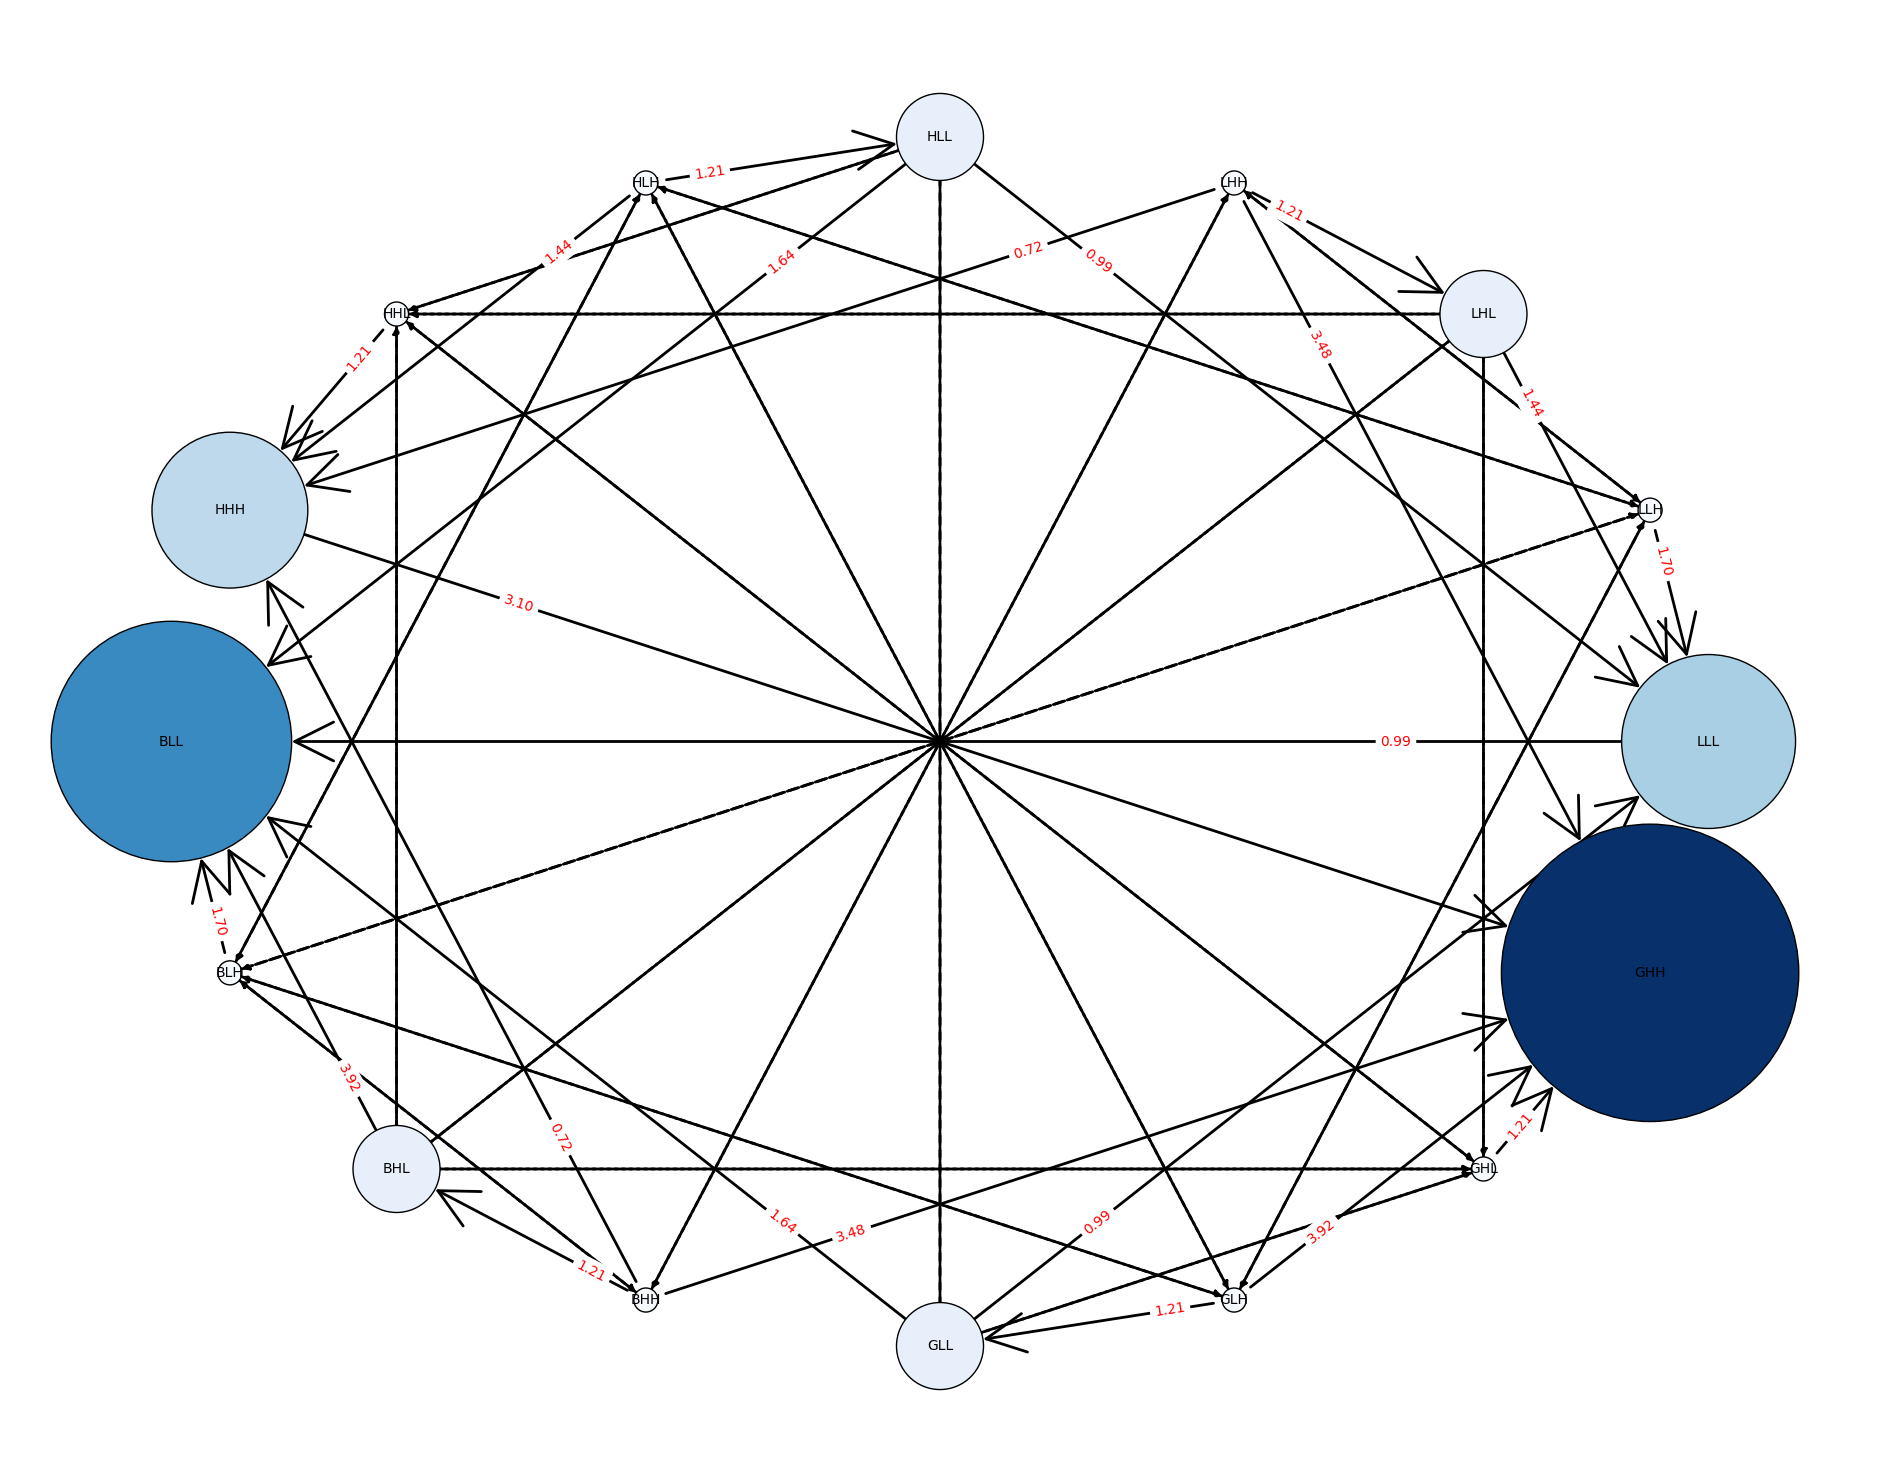

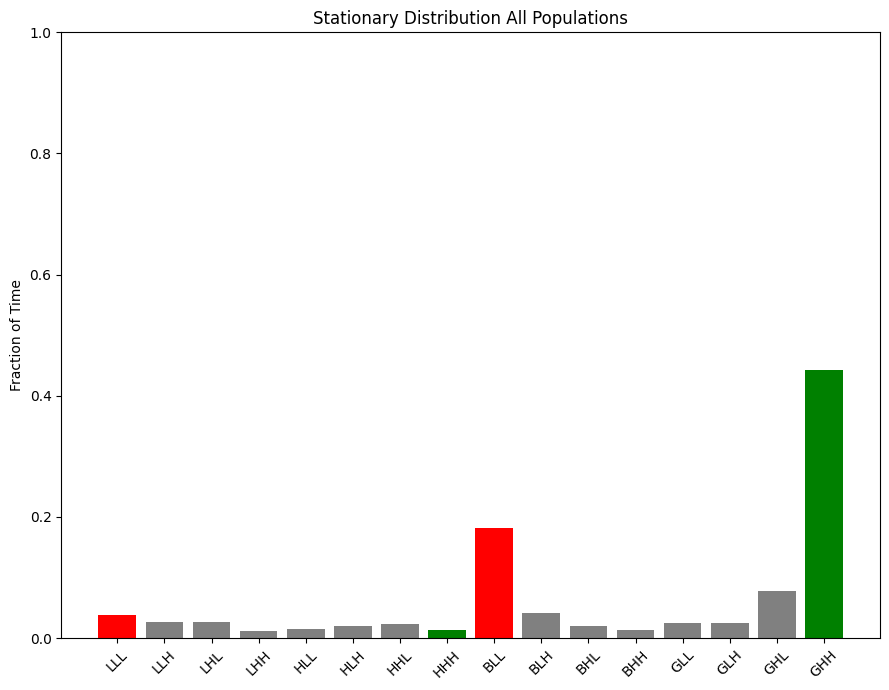

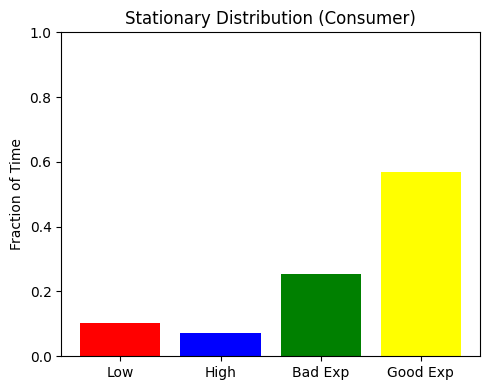

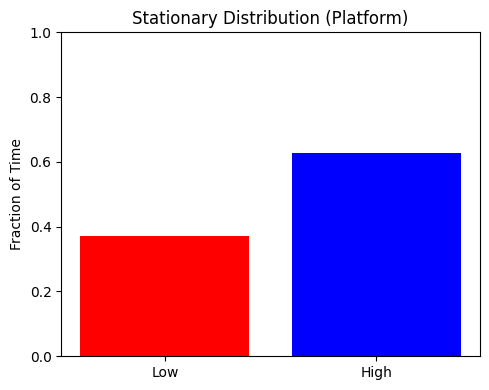

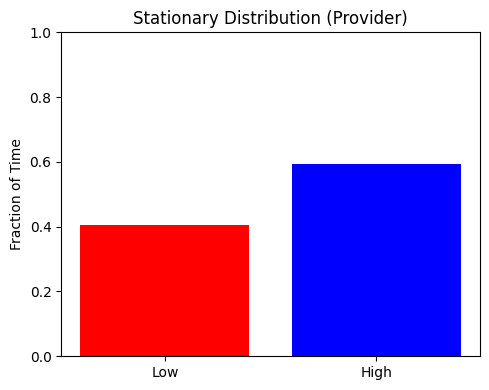

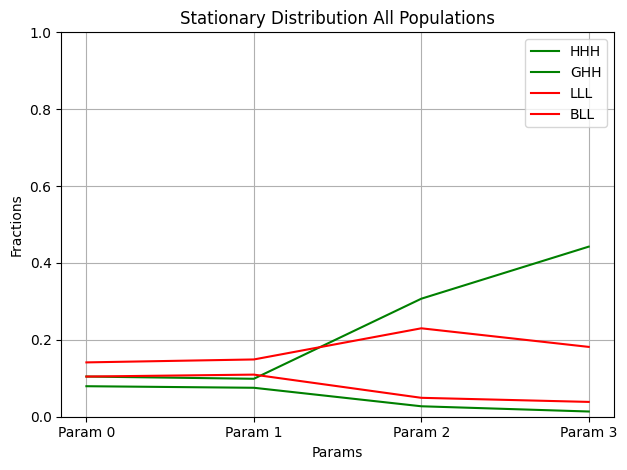

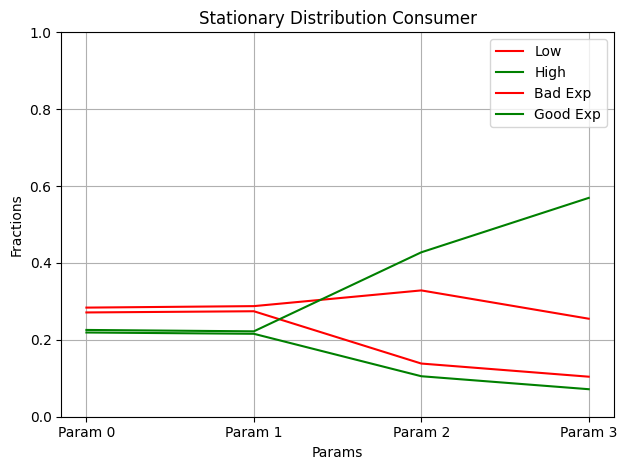

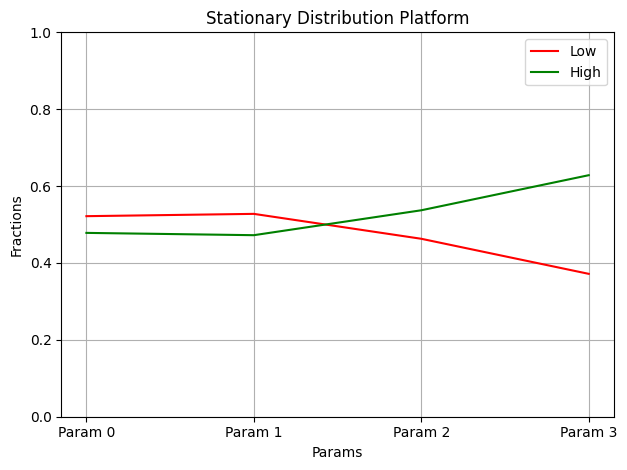

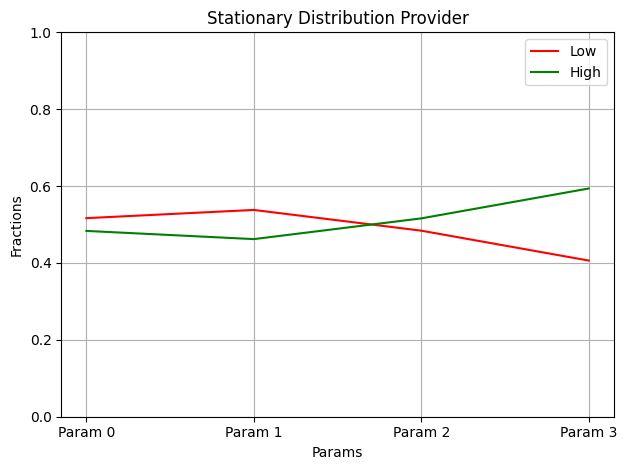

In [2]:
strategies_countss = [[25, 25, 25, 25], [25, 25], [25, 25]]
actions_names = [["Low", "High", "Bad Exp", "Good Exp"], ["Low", "High"], ["Low", "High"]]
actions_symbols = [["L", "H", "B", "G"], ["L", "H"], ["L", "H"]]
players_names = ["Consumer", "Platform", "Provider"]


a = 0.2
rl = 0.2 
rh = 0.1 
cls = [0.0, 0.05, 0.05, 0.05]
chs = [0.0, 0.15, 0.15, 0.15]
uls = [0.0, 0.0,  0.2,  0.2] 
uhs = [0.0, 0.0,  0.4,  0.8]
r = 0.8

folder = posixpath.join(OUTPUT_PATH, "watch_time")

stationary_distributions = []

for i, params in enumerate(zip(cls, chs, uls, uhs)):
    cl, ch, ul, uh = params
    payoff_watch_time = {
        (0, 0, 0): [rl, a,  a-cl],  
        (0, 0, 1): [0,  0,  -ch],   
        (0, 1, 0): [0, 0,  -cl],   
        (0, 1, 1): [0,  0,  -ch],   
    
        (1, 0, 0): [0, 0,  -cl],  
        (1, 0, 1): [0, 0,  -ch],   
        (1, 1, 0): [0, 0,  -cl],   
        (1, 1, 1): [rh, a,  a-ch], 
        
        (2, 0, 0): [rl+ul, a+r,  a-cl],  
        (2, 0, 1): [0,  0,  -ch],   
        (2, 1, 0): [0, 0,  -cl],   
        (2, 1, 1): [0,  0,  -ch],   
        
        (3, 0, 0): [0, 0,  -cl],   
        (3, 0, 1): [0, 0,  -ch],   
        (3, 1, 0): [0, 0,  -cl],   
        (3, 1, 1): [rh+uh, a+r,  a-ch] 
    }

    payoff_matrix = payoff_watch_time
    game = EGT.Game(strategies_countss=strategies_countss, payoff_matrix=payoff_matrix, actions_names=actions_names, players_names=players_names)
    print(f"(cl, ch): ({cl}, {ch}) | (ul, uh): ({ul}, {uh})")
    matrix, states = game.compute_trans_matrix(beta=0.08)
    filepath = posixpath.join(folder, f"trans_matrix (cl, ch)({cl}, {ch}) - (ul, uh)({ul}, {uh}).png")
    game.plot_transition_matrix(matrix, states=states, actions_symbols=actions_symbols, scale=150, save_file_name=filepath)
    stationary_distributions.append(game.compute_stationary_distribution(matrix))
    green = [(1,1,1), (3,1,1)]
    red = [(0,0,0), (2,0,0)]

    filepath = posixpath.join(folder, f"stat_distr_all_pop (cl, ch)({cl}, {ch}) - (ul, uh)({ul}, {uh}).png")
    game.plot_stationary_distribution_all_pop(stationary_distributions[i], actions_symbols=actions_symbols, states=states, title="Stationary Distribution All Populations", ylabel="Fraction of Time", red=red, green=green, save_file_name=filepath)

    for player in range(len(players_names)):
        filepath = posixpath.join(folder, f"stat_distr_per_pop_{players_names[player]} (cl, ch)({cl}, {ch}) - (ul, uh)({ul}, {uh}).png")
        game.plot_stationary_distribution_per_pop(stationary_distributions[i], player=player, actions_symbols=actions_symbols, states=states, title=f"Stationary Distribution ({players_names[player]})", ylabel="Fraction of Time", save_file_name=filepath)

green = [(1,1,1), (3,1,1)]
red = [(0,0,0), (2,0,0)]
filepath = posixpath.join(folder, f"stat_distrs_all_pop")
game.plot_stationary_distributions_all_pop(stationary_distributions, green, red, states, actions_symbols, save_file_name=filepath)

for player in range(len(players_names)):
    filepath = posixpath.join(folder, f"stat_distrs_per_pop_{players_names[player]}")
    game.plot_stationary_distributions_per_pop(stationary_distributions, states, actions_symbols, actions_names, players_names=players_names, player=player, save_file_name=filepath)
